<a href="https://colab.research.google.com/github/dsliinxy/project-assignment-2-ITMO/blob/main/ProjectAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вооруженные нападения в школах США в период с 2009 по 2018 год.

Данные: https://www.kaggle.com/code/docxian/school-shootings/input?select=dataset.csv

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from datetime import datetime

In [ ]:
df = pd.read_csv('school_shooting.csv')
df

,LONCOD,LATCOD,CDCODE,year,school,city,state,address,urbanrural,race,killed,injured,victims,date,type,NCESSCH,time
0,-75.584900,39.668100,1000.0,2009,William Penn High School,New Castle,Delaware,713 E Basin Rd,suburbtown,BLACK,0,1,1,8-Jan-09,High School,1.000230e+11,8:30PM
1,-87.617500,41.839900,1701.0,2009,Dunbar Vocational Career Academy,Chicago,Illinois,3000 S King Dr,urban,BLACK,0,5,5,9-Jan-09,High School,1.709930e+11,8:00PM
2,-90.165100,38.565700,1712.0,2009,Cahokia High School,Cahokia,Illinois,800 Range Ln,suburbtown,BLACK,1,0,1,23-Jan-09,High School,1.708040e+11,7:20PM
3,-78.311800,35.831500,3713.0,2009,Zebulon Middle School,Zebulon,North Carolina,Halifax Road and New Oak Street,suburbtown,BLACK,0,1,1,11-Feb-09,Middle School,3.704720e+11,6:00AM
4,-83.113977,42.383593,NaN,2009,Central High School,Detroit,Michigan,2425 Tuxedo St,urban,NaN,0,1,1,17-Feb-09,High School,2.601103e+11,2:20PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-149.881113,61.213281,200.0,2018,Denali Elementary School,Anchorage,Alaska,952 Cordova St,urban,WHITE,0,1,1,3-Oct-18,Elementary School,2.001800e+10,9:30AM
176,-77.378427,37.471892,5104.0,2018,Varina High School,Henrico,Virginia,7053 Messer Rd,rural,BLACK,0,1,1,7-Oct-18,High School,5.101890e+11,9:30PM
177,-80.691593,35.120282,3709.0,2018,Butler High School,Matthews,North Carolina,1810 Matthews Mint Hill Rd,suburbtown,WHITE,1,0,1,29-Oct-18,High School,3.702970e+11,7:15AM
178,-76.382449,36.826811,5103.0,2018,Simonsdale Elementary School,Portsmouth,Virginia,4841 Clifford St,urban,WHITE,0,1,1,20-Nov-18,Elementary School,5.103000e+11,4:00PM


С 2009 года по крайней мере 177 американских школ подверглись стрельбе. Нет стандартного определения того, что квалифицируется как школьная стрельба в США. Также не существует общепринятой базы данных, так что CNN создал свою собственную.

**Пояснения к названию столбцов в таблице:**

LONCOD, LATCOD, CDCODE: координаты вооруженных нападений.

school: наименование учебного заведения, где произошло вооруженное нападение.

city: наименование города, где произошло вооруженное нападение.

state: наменование штата, где произошло вооруженное нападение.

address: точный адресс, где произошло вооруженное нападение.

urbanrural: юридическое наименование местности, в которой произошло вооруженное нападение.

race: раса нападавшего.

killed: количество убитых.

injured: количество людей, получивших ранения.

victims: количество пострадавших.

type: тип учебного заведения.

NCESSCH: код учебного заведения в специализированной системе США.

time: время начала совершения вооруженного нападения.

# Первичный анализ

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LONCOD      177 non-null    float64
 1   LATCOD      177 non-null    float64
 2   CDCODE      169 non-null    float64
 3   year        180 non-null    int64  
 4   school      180 non-null    object 
 5   city        180 non-null    object 
 6   state       180 non-null    object 
 7   address     180 non-null    object 
 8   urbanrural  177 non-null    object 
 9   race        173 non-null    object 
 10  killed      180 non-null    int64  
 11  injured     180 non-null    int64  
 12  victims     180 non-null    int64  
 13  date        180 non-null    object 
 14  type        180 non-null    object 
 15  NCESSCH     175 non-null    float64
 16  time        174 non-null    object 
dtypes: float64(4), int64(4), object(9)
memory usage: 24.0+ KB


In [ ]:
df.isnull().sum()

LONCOD         3
LATCOD         3
CDCODE        11
year           0
school         0
city           0
state          0
address        0
urbanrural     3
race           7
killed         0
injured        0
victims        0
date           0
type           0
NCESSCH        5
time           6
dtype: int64

Требуется дополнительная обработка в столбцах LONCOD, LATCOD, CDCODE, urbanrural, race, NCESSCH и time.

In [ ]:
df.describe()

,LONCOD,LATCOD,CDCODE,year,killed,injured,victims,NCESSCH
count,177.000000,177.000000,169.000000,180.000000,180.000000,180.000000,180.000000,1.750000e+02
mean,-92.830582,36.812586,2588.940828,2014.694444,0.633333,1.344444,1.977778,2.525708e+11
std,15.759432,5.364672,1593.753438,2.774781,2.456095,1.822645,3.617085,1.616620e+11
min,-157.961977,21.400303,101.000000,2009.000000,0.000000,0.000000,1.000000,2.595080e+05
25%,-96.858636,33.612911,1222.000000,2013.000000,0.000000,1.000000,1.000000,1.200435e+11
50%,-87.636600,36.719900,2406.000000,2016.000000,0.000000,1.000000,1.000000,2.400510e+11
75%,-81.937661,40.077165,3908.000000,2017.000000,1.000000,2.000000,2.000000,3.904427e+11
max,-71.043600,61.213281,5504.000000,2018.000000,26.000000,14.000000,31.000000,5.509600e+11


Всего 180 вооруженных нападений.

Среднее занчение убитых - 0,63; раненых - 1,34; пострадавших - 1,98.

Максимальное количество убитых - 26; раненых - 14; пострадавших - 31.

# Исследование данных

Динамика количества жертв от нападений с оружием в школах США за период с 2009 по 2018 год.

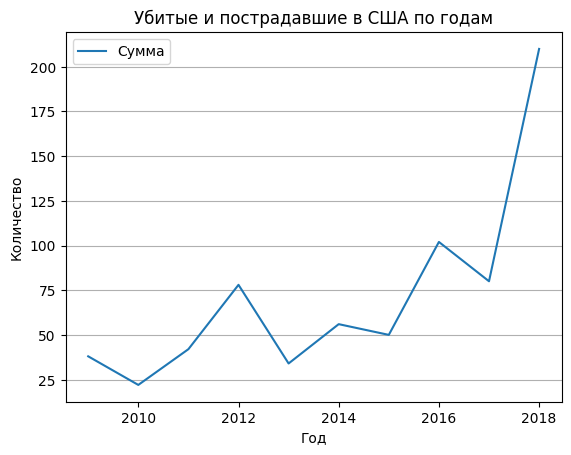

In [ ]:
grouped_df = df.groupby('year')[['killed', 'injured', 'victims']].sum()
grouped_df['total'] = grouped_df.sum(axis=1)
grouped_df.plot(y='total', kind='line')
plt.grid(axis='y')
plt.title('Убитые и пострадавшие в США по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(['Сумма'])
plt.show()


По графику видно, что основная активность пришлась на 2012 и 2018 года. В 2013 году произошла очередная попытка противников второй поправки остановить продажу оружия, но к 2018 году конгресс отменил запрет на продажу оружия людям с психическими заболеваниями.

Наиболее большое количетсво нападений с оружием в школах США на карте. В каких штатах данная динамика прослеживается сильнее?

In [ ]:
# Удаление строк с пропущенными значениями LATCOD и LONCOD
df = df.dropna(subset=['LATCOD', 'LONCOD'])

# Создание пустой карты
map = folium.Map(location=[df['LATCOD'].mean(), df['LONCOD'].mean()], zoom_start=4)

# Добавление маркера для каждой записи с координатами убийства
for index, row in df.iterrows():
    lat = row['LATCOD']
    lon = row['LONCOD']
    killed = row['killed']
    injured = row['injured']
    victims = row['victims']
    popup_text = f"Убийство: {killed}<br>Раненные: {injured}<br>Пострадавшие: {victims}"
    marker = folium.Marker(location=[lat, lon], popup=popup_text)
    marker.add_to(map)
map

По карте можно скзать, что большинство убийтсв происходило в восточной части США. Что не удивительно, ведь по данным из Википедии наиболее легко получить оружие в штатах Мэн и Луизиана.

Далее логично посмотреть, сколько из этих нападений происходили в больших и маленьких городах и в сельской местности.

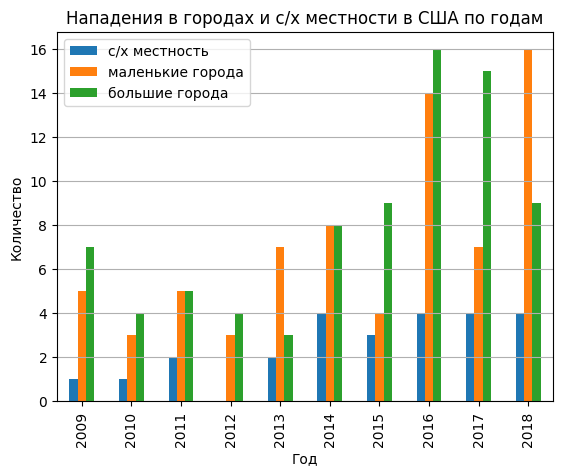

In [ ]:
df = df.dropna(subset=['year', 'urbanrural'])

# Подсчет количества значений 'urban', 'rural' и 'suburbtown' в столбце 'urbanrural' для каждого года
grouped_df = df.groupby(['year', 'urbanrural']).size().unstack()

# Построение столбчатой диаграммы
grouped_df.plot(kind='bar')
plt.grid(axis='y')
plt.title('Нападения в городах и с/х местности в США по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(['с/х местность', 'маленькие города', 'большие города'])
plt.show()

По графику видно, что динамика нападений неуклонно растет с каждым годом. Недостаточное финансирование и доступ к услугам психического здоровья, а также отсутствие своевременной помощи и поддержки для людей с психическими расстройствами могут быть факторами, влияющими на увеличение числа нападений.


Представители каких рас совершили больше всего нападений?

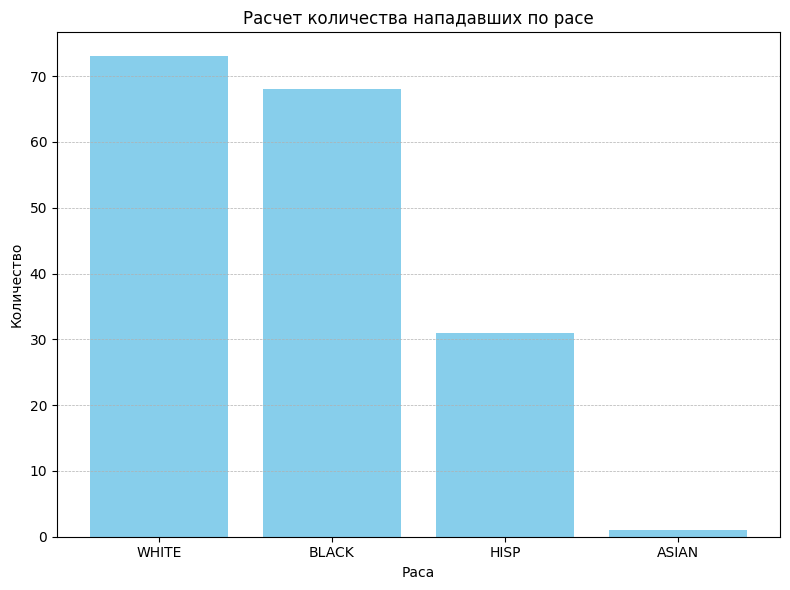

In [ ]:
grouped_data = df["race"].value_counts().reset_index()
grouped_data.columns = ["race", "count"]
plt.figure(figsize=(8, 6))
plt.bar(grouped_data["race"], grouped_data["count"], color="skyblue")
plt.title("Расчет количества нападавших по расе")
plt.xlabel("Раса")
plt.ylabel("Количество")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

Эта статистика разрушает стереотипы и доказывает, что утверждение о разнице в числе нападений на школы с оружием, основанное на расовой принадлежности, может быть слишком упрощенным и вводить в заблуждение. Расчет и объяснение таких сложных проблем, как насилие и нападения, требуют всестороннего освещения факторов, таких как психологические, социальные, экономические и законодательные.

В какие часы чаще всего совершались вооруженные нападения?

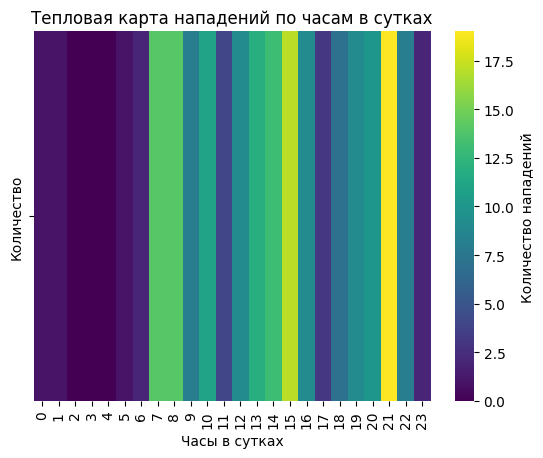

In [ ]:
# Чтобы работать с отсутствующими значениями и конвертировать значения времени в объекты datetime
df['time'] = pd.to_datetime(df['time'], format='%I:%M%p', errors='coerce')

# Подсчет количества событий по каждому часу
df['hour'] = df['time'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()

# Создание DataFrame для тепловой карты
heatmap_data = hourly_counts.reindex(range(24)).fillna(0)  # Обеспечиваем наличие всех часов
heatmap_data = pd.DataFrame({'Hour': range(24), 'Количество': heatmap_data}).set_index('Hour')
sns.heatmap(heatmap_data.T, cmap='viridis', cbar_kws={'label': 'Количество нападений'})
plt.title('Тепловая карта нападений по часам в сутках')
plt.xlabel('Часы в сутках')
plt.show()

Учитывая, что ученики и персонал школы могут быть менее бдительными и менее настороженными в начале и в конце дня (расписание у старших школ и колледжей различаются, поэтому скорее одни заканчивают раньше, другие - позже. Но в середине учебного дня нападения все же происходят меньше всего), потенциальные нарушители могут считать это подходящим моментом для своих действий. Возможно, люди, совершающие нападения, рассчитывают на шок и неожиданность, какие могут возникнуть, чтобы создать максимальную панику и хаос.


В какого типа учебных заведениях вооруженных нападений происходило больше всего?

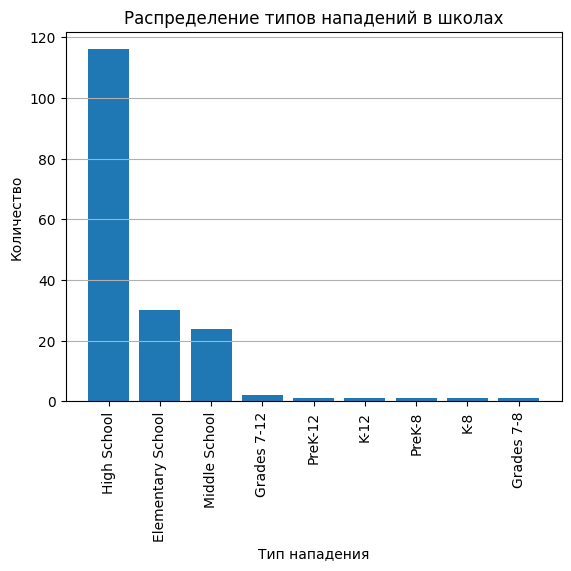

In [ ]:
# Получение частоты появления каждого типа нападения
type_counts = df["type"].value_counts()

# Наиболее часто встречающийся тип нападения
most_common_type = type_counts.idxmax()

# Построение столбчатой диаграммы
plt.bar(type_counts.index, type_counts.values)
plt.xlabel("Тип нападения")
plt.ylabel("Количество")
plt.title("Распределение типов нападений в школах")

# Расположение подписей по вертикали
plt.xticks(rotation='vertical')

# Отображение диаграммы
plt.show()

Анализируя данные, можно заметить, что наибольшее количество вооруженных нападений в США происходило в старших типах школ. Это наблюдение говорит о том, что старшие школы становятся более уязвимыми для такого рода инцидентов.